In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y = a + b*x  
a и b - коэффициенты линейной регрессии  
a - intercept  
b - slope (наклон прямой)

In [2]:
def mse_(y, y_pred):
    return np.sum((y_pred-y)**2)/len(y)

**1) Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).  
Произвести расчет как с использованием intercept, так и без.**

In [3]:
x = zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

### Способ 1:

Коэффициенты уравнения линейной регрессии можно найти следующим образом:  
$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [4]:
b = ((x*y).mean()-x.mean()*y.mean()) / ((x**2).mean()-x.mean()**2)
b

2.620538882402765

In [5]:
a = y.mean() - b*x.mean()
a

444.1773573243596

In [6]:
print("a:", a)
print("b:", b)

a: 444.1773573243596
b: 2.620538882402765


In [7]:
y_pred = a + b * x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [8]:
mse_(y, y_pred)

6470.414201176658

<function matplotlib.pyplot.show(*args, **kw)>

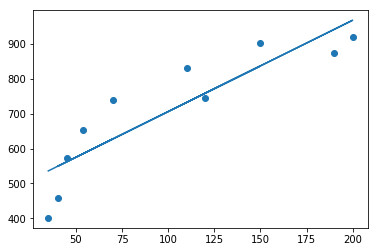

In [9]:
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show

### Способ 2:

$W = (X \cdot X^T)^{-1} \cdot X \cdot y^T$

#### Без intercept:

In [10]:
X_mtrx = x.reshape((1, len(x)))
X_mtrx

array([[ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]])

In [11]:
y_mtrx = y.reshape((1,len(x)))
y_mtrx

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [12]:
coefs_ = np.linalg.inv(X_mtrx @ X_mtrx.T) @ X_mtrx @ y_mtrx.T
coefs_

array([[5.88982042]])

In [13]:
a = 0
b = coefs_[0, 0]
print("a:", a)
print("b:", b)

a: 0
b: 5.889820420132689


In [14]:
y_pred = a + b * x
y_pred

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

In [15]:
mse_(y, y_pred)

56516.85841571941

#### С intercept:

In [16]:
X_mtrx = np.vstack([np.ones((1,len(x))), x])
X_mtrx

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [17]:
y_mtrx = y.reshape((1,len(x)))
y_mtrx

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [18]:
coefs_ = np.linalg.inv(X_mtrx @ X_mtrx.T) @ X_mtrx @ y_mtrx.T
coefs_

array([[444.17735732],
       [  2.62053888]])

In [19]:
a, b = coefs_
print("a:", a)
print("b:", b)

a: [444.17735732]
b: [2.62053888]


In [20]:
y_pred = a + b * x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [21]:
mse_(y, y_pred)

6470.414201176662

**2) Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).**

#### Без intercept:

In [22]:
def mse_2(w1):
    return np.sum((w1*x - y)**2) / len(x)

f = (1/n) \* np.sum((w1\*X - y)\*\*2)  
f_p_w1 = (1/n) \* np.sum(2 \* (w1\*X - y) \* X) = (2/n) * np.sum((w1\*X - y) \* X)

In [23]:
alpha = 1e-6
w1 = 0.1
for i in range(501):
    w1 -= alpha * (2/len(x)) * np.sum((w1*x - y) * x)
    if i % 25 == 0:
        print("Iteration: {i}; w1 = {w1}; mse = {mse}".format(i=i, w1=w1, mse=mse_2(w1)))

Iteration: 0; w1 = 0.25952808; mse = 493237.7212546963
Iteration: 25; w1 = 3.089696614991865; mse = 164534.9540647404
Iteration: 50; w1 = 4.497229618367758; mse = 83233.94472982832
Iteration: 75; w1 = 5.19724063576749; mse = 63125.03547000552
Iteration: 100; w1 = 5.54537842245223; mse = 58151.31823171113
Iteration: 125; w1 = 5.7185184381164955; mse = 56921.12405027273
Iteration: 150; w1 = 5.804626485478126; mse = 56616.849068093856
Iteration: 175; w1 = 5.84745076149535; mse = 56541.590002348865
Iteration: 200; w1 = 5.868748638669329; mse = 56522.97550129376
Iteration: 225; w1 = 5.879340751702029; mse = 56518.37140946641
Iteration: 250; w1 = 5.884608547059329; mse = 56517.232638059555
Iteration: 275; w1 = 5.887228389562966; mse = 56516.9509754938
Iteration: 300; w1 = 5.888531320728348; mse = 56516.88130936019
Iteration: 325; w1 = 5.889179309918296; mse = 56516.86407820931
Iteration: 350; w1 = 5.889501575592372; mse = 56516.85981627392
Iteration: 375; w1 = 5.88966184858195; mse = 56516.8

In [24]:
a, b = 0, w1
print("a:", a)
print("b:", b)

a: 0
b: 5.889815595583751


In [25]:
y_pred = a + b * x
y_pred

array([ 206.14354585,  265.0417018 , 1119.06496316, 1177.96311912,
        235.59262382,  412.28709169,  318.05004216,  883.47233934,
        706.77787147,  647.87971551])

In [26]:
mse_(y, y_pred)

56516.858416040064

**3) В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?**

Таблица значений функции Лапласа используется тогда, когда известна дисперсия генеральной выборки и/или количество наблюдений велико (более тридцати, например).  
Таблица значений Стьюдента используется когда дисперсия неизвестна и количество наблюдений мало, т.к. с увеличением объема выборки, распределение Стьюдента стремится к нормальному.

***4. Произвести вычисления как в пункте 2, но с вычислением intercept.  
Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**

#### С intercept:

In [27]:
def mse_3(w0, w1):
    return np.sum(((w0 + w1*x) - y)**2) / len(x)

f = (1/n) \* np.sum(((w0 + w1\*X) - y)\*\*2)  
f_p_w0 = (1/n) \* np.sum(2 \* ((w0 + w1\*X) - y) \* 1) = (2/n) * np.sum(((w0 + w1\*X) - y) \* 1)  
f_p_w1 = (1/n) \* np.sum(2 \* ((w0 + w1\*X) - y) \* X) = (2/n) * np.sum(((w0 + w1\*X) - y) \* X)

In [28]:
alpha = 5e-5
w0 = 0.1
w1 = 0.1
for i in range(1000001):
    w0 -= alpha * ((2/len(x)) * np.sum(((w0 + w1*x) - y) * 1))
    w1 -= alpha * ((2/len(x)) * np.sum(((w0 + w1*x) - y) * x))
    if i % 25000 == 0:
        print("Iteration: {i}; w0 = {w0}; w1 = {w1}; mse = {mse}".format(i=i, w0=w0, w1=w1, mse=mse_3(w0, w1)))

Iteration: 0; w0 = 0.169966; w1 = 8.074680544760001; mse = 122318.06397097581
Iteration: 25000; w0 = 208.68130373121608; w1 = 4.353849987980955; mse = 20538.26203396842
Iteration: 50000; w0 = 319.27767648420047; w1 = 3.5398324356503275; mse = 10427.569111705801
Iteration: 75000; w0 = 377.93450511535644; w1 = 3.108103194615863; mse = 7583.525117078449
Iteration: 100000; w0 = 409.0442373734796; w1 = 2.879127619051743; mse = 6783.521961452364
Iteration: 125000; w0 = 425.54385836829897; w1 = 2.7576861941454864; mse = 6558.488505492904
Iteration: 150000; w0 = 434.29473705519484; w1 = 2.693277491833349; mse = 6495.188684804794
Iteration: 175000; w0 = 438.9359271659735; w1 = 2.6591171471508397; mse = 6477.383033275948
Iteration: 200000; w0 = 441.3974680483413; w1 = 2.6409995775222037; mse = 6472.374468908443
Iteration: 225000; w0 = 442.7029917116536; w1 = 2.6313905898993206; mse = 6470.965606279485
Iteration: 250000; w0 = 443.39540029510493; w1 = 2.62629428586797; mse = 6470.569306309746
Iter

In [29]:
a, b = w0, w1
print("a:", a)
print("b:", b)

a: 444.17735732000267
b: 2.620538882434834


In [30]:
y_pred = a + b * x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.28513381,
       548.99891262, 627.61507909, 585.68645697, 837.25818969,
       758.64202321, 732.43663439])

In [31]:
mse_(y, y_pred)

6470.414201176662